{-110.0: ([<matplotlib.lines.Line2D at 0x114ecc5d0>],
  [<matplotlib.text.Text at 0x114edf510>]),
 -108.0: ([<matplotlib.lines.Line2D at 0x114eccc50>],
  [<matplotlib.text.Text at 0x114edfa50>]),
 -106.0: ([<matplotlib.lines.Line2D at 0x114ed72d0>],
  [<matplotlib.text.Text at 0x114edfe90>]),
 -104.0: ([<matplotlib.lines.Line2D at 0x114ed7910>],
  [<matplotlib.text.Text at 0x117b59310>]),
 -102.0: ([<matplotlib.lines.Line2D at 0x114ed7f50>],
  [<matplotlib.text.Text at 0x117b59750>])}

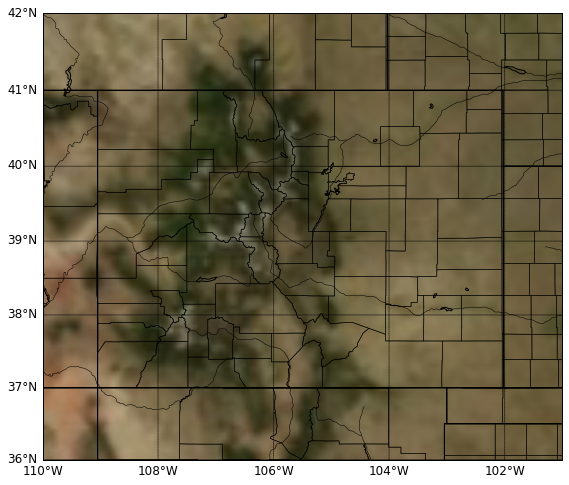

In [3]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap

%matplotlib inline

fig=plt.figure(figsize=(10,8))

# Create the map
m = Basemap(llcrnrlon=-110.0,llcrnrlat=36.0,\
            urcrnrlon=-101.0,urcrnrlat=42.0,\
            projection='merc',resolution='h')

m.bluemarble()
m.drawcoastlines(linewidth=1)
#m.drawmapboundary(fill_color='aqua')
#m.fillcontinents(color='lightgrey',lake_color='aqua')
#m.drawcountries(linewidth=1)
m.drawcounties(linewidth=0.5)
m.drawstates(linewidth=1)
m.drawrivers()
parallels = np.arange(0.,90.,1.)
m.drawparallels(parallels,labels=[True,False,False,False], fontsize = 12)
meridians = np.arange(10.,350.,2.)
m.drawmeridians(meridians,labels=[True,True,False,True], fontsize = 12)




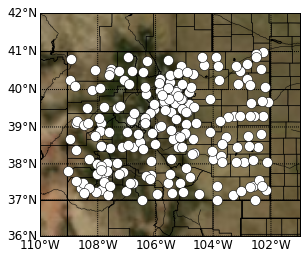

In [69]:
df_metadata = pd.read_csv('metadata.csv')
lats = np.array(df_metadata.Latitude)
lons = np.array(df_metadata.Longitude)

df_dateinfo = pd.read_csv('DateInfo.csv')
mo = np.array(df_dateinfo.mo)
da = np.array(df_dateinfo.da)
yr = np.array(df_dateinfo.yr)

df_precip = pd.read_csv('COPrecip.csv')

m.bluemarble()
m.drawcoastlines(linewidth=1)
#m.drawmapboundary(fill_color='aqua')
#m.fillcontinents(color='lightgrey',lake_color='aqua')
#m.drawcountries(linewidth=1)
m.drawcounties(linewidth=0.5)
m.drawstates(linewidth=1)
m.drawrivers()
parallels = np.arange(0.,90.,1.)
m.drawparallels(parallels,labels=[True,False,False,False], fontsize = 12)
meridians = np.arange(10.,350.,2.)
m.drawmeridians(meridians,labels=[True,True,False,True], fontsize = 12)
x,y = m(lons, lats)
m.plot(x, y, 'wo', markersize=10)


In [97]:
data = df_precip.iloc[[30000]].replace("NaN", 0).values[0]
data = np.delete(data, 0)
print len(data)
print len(lons)
print len(lats)


197
197
197


AttributeError: 'numpy.ndarray' object has no attribute 'replace'

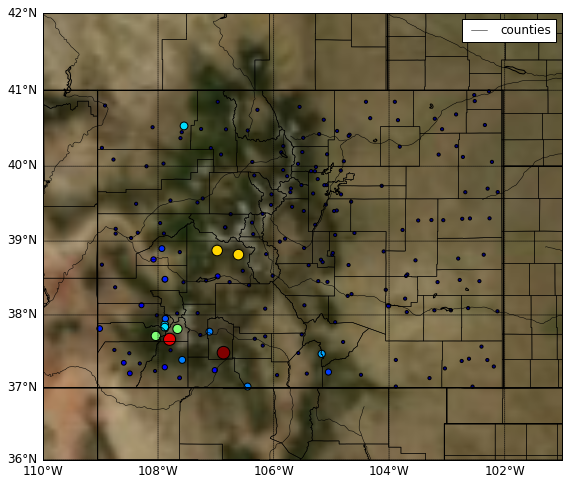

In [100]:
fig=plt.figure(figsize=(10,8))
sizes = 10*data + 10

m.bluemarble()
m.drawcoastlines(linewidth=1)
#m.drawmapboundary(fill_color='aqua')
#m.fillcontinents(color='lightgrey',lake_color='aqua')
#m.drawcountries(linewidth=1)
m.drawcounties(linewidth=0.5)
m.drawstates(linewidth=1)
m.drawrivers()
parallels = np.arange(0.,90.,1.)
m.drawparallels(parallels,labels=[True,False,False,False], fontsize = 12)
meridians = np.arange(10.,350.,2.)
m.drawmeridians(meridians,labels=[True,True,False,True], fontsize = 12)
sc = plt.scatter(x, y, c=data, s=sizes)
plt.legend()

TypeError: 'PathCollection' object is not iterable

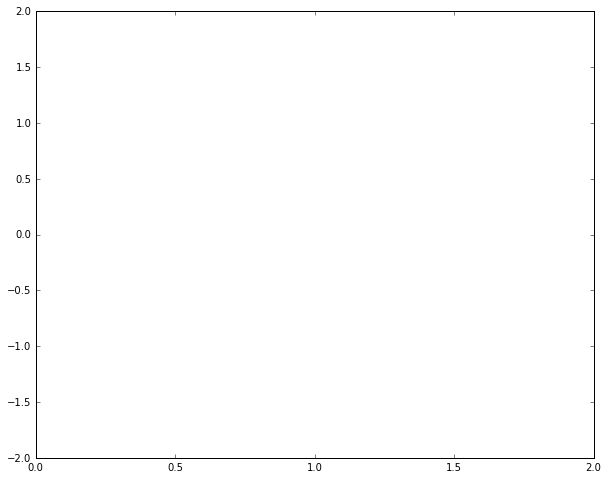

In [93]:
import matplotlib.animation as animation

fig=plt.figure(figsize=(10,8))
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.scatter(x, y, [],)

m.bluemarble()
m.drawcoastlines(linewidth=1)
#m.drawmapboundary(fill_color='aqua')
#m.fillcontinents(color='lightgrey',lake_color='aqua')
#m.drawcountries(linewidth=1)
m.drawcounties(linewidth=0.5)
m.drawstates(linewidth=1)
m.drawrivers()
parallels = np.arange(0.,90.,1.)
m.drawparallels(parallels,labels=[True,False,False,False], fontsize = 12)
meridians = np.arange(10.,350.,2.)
m.drawmeridians(meridians,labels=[True,True,False,True], fontsize = 12)
sc = plt.scatter(x, y, c=data)

def init():
    data = df_precip.iloc[[30000]].replace("NaN", 0).values[0]
    data = np.delete(data, 0)
    return data

def updatefig(i):
    data = df_precip.iloc[[30000 + i]].replace("NaN", 0).values[0]
    data = np.delete(data, 0)
    return data
    


ani = animation.FuncAnimation(fig, updatefig, init_func=init, frames=100)

plt.show()